# PHASE 3 PROJECT
# PREDICTING TERRY STOP OUTCOMES

# 1. Business Understanding

A Terry stop is a police procedure that permits law enforcement officers to briefly detain an individual based on reasonable suspicion of criminal activity. Terry Stops are controversial because they give police a wider scope of authority or freedom to make decisions which may lead to wrongful arrests. If most stops don’t lead to arrests, it raises questions about whether they are fair or effective, a concern to policy makers and civil rights organizations.

## 1.1 OBJECTIVES


## 1.1.1: main objective

To predict whether an arrest was made after a Terry Stop, based on other information from the dataset.

## 1.1.2: specific objectives

1. To Identify the key features that most strongly influence the likelihood of arrest after a stop.
2. To compare multiple models to ensure the best results.
3. To evaluate the relationship between frisks and arrests.
4. To analyze the gender distribution of subject persons involved in Terry Stops.
5. To examine the racial and ethnic distribution of persons involved in Terry Stops.
6. To examine the racial and ethnic distribution of persons involved in Terry Stops that led to arrests.

## 1.2: Research questions

1. What key factors most strongly influence the likelihood of arrest after a stop?
2. What is the relationship between frisks and arrests?
3. What is the gender distribution of persons involved in Terry Stops and does gender influence stop outcomes?
4. What is the racial and ethnic distribution of persons involved in Terry Stops?



## 1.3: Defining the metric for success

To build a model that can correctly predict whether a Terry stop resulted in an arrest.

# 2. Data Understanding

Our dataset is from Seattle city government where Each row is a unique record of a Terry Stop, as reported by the officer conducting the stop.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Terry_Stops_20250908.csv')
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,46 - 55,-1,20180000275629,481899,Field Contact,NaN,8544,1993,Female,Hispanic,...,13:47:00.0000000,-,-,-,NORTH PCT 2ND WATCH - B/N RELIEF,N,N,West,Q,Q2
1,36 - 45,53986235598,20240000029589,53986202139,Field Contact,-,8723,1994,Male,White,...,02:50:52.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,DISTURBANCE - OTHER,ONVIEW,WEST PCT 3RD W - KING - PLATOON 1,N,N,West,D,D2
2,26 - 35,-1,20170000036835,234548,Offense Report,NaN,4852,1953,Male,Asian,...,18:36:00.0000000,DISTURBANCE,THEFT - SHOPLIFT,911,NORTH PCT 2ND W - LINCOLN - PLATOON 1,N,N,North,L,L3
3,18 - 25,-1,20180000271087,445585,Offense Report,NaN,8588,1986,Female,White,...,05:43:00.0000000,"OBS WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/D...","WEAPON, PERSON WITH - GUN",911,TRAINING - FIELD TRAINING SQUAD,N,Y,North,J,J1
4,18 - 25,-1,20150000002928,54115,Field Contact,NaN,7745,1988,Female,Declined to Answer,...,00:22:00.0000000,-,-,-,SOUTH PCT 3RD W - SAM - PLATOON 2,N,N,-,-,-


In [2]:
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

In [3]:
df.shape

(64699, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64699 entries, 0 to 64698
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         64699 non-null  object
 1   Subject ID                64699 non-null  int64 
 2   GO / SC Num               64699 non-null  int64 
 3   Terry Stop ID             64699 non-null  int64 
 4   Stop Resolution           64699 non-null  object
 5   Weapon Type               32134 non-null  object
 6   Officer ID                64699 non-null  object
 7   Officer YOB               64699 non-null  int64 
 8   Officer Gender            64699 non-null  object
 9   Officer Race              64699 non-null  object
 10  Subject Perceived Race    64699 non-null  object
 11  Subject Perceived Gender  64699 non-null  object
 12  Reported Date             64699 non-null  object
 13  Reported Time             64699 non-null  object
 14  Initial Call Type     

# 3. Data preparation

## 3.1. Data cleaning

In [5]:
# unique categories 'Weapon Type' column
df['Weapon Type'].unique()

array([nan, '-', 'Knife/Cutting/Stabbing Instrument',
       'Lethal Cutting Instrument', 'Club, Blackjack, Brass Knuckles',
       'Firearm Other', 'Blunt Object/Striking Implement', 'Handgun',
       'Mace/Pepper Spray', 'Shotgun', 'Firearm (unk type)',
       'None/Not Applicable', 'Fire/Incendiary Device', 'Firearm',
       'Other Firearm', 'Rifle', 'Club', 'Taser/Stun Gun',
       'Automatic Handgun', 'Personal Weapons (hands, feet, etc.)',
       'Blackjack', 'Poison', 'Brass Knuckles'], dtype=object)

In [6]:
# filling null values with an existing category
df['Weapon Type'] = df['Weapon Type'].fillna('None/Not Applicable')

In [7]:
df['Weapon Type'] = df['Weapon Type'].replace('-', 'None/Not Applicable')

In [8]:
# checking for null values
df['Weapon Type'].isna().sum()

0

In [9]:
df['Weapon Type'].value_counts()

Weapon Type
None/Not Applicable                     60587
Knife/Cutting/Stabbing Instrument        1491
Lethal Cutting Instrument                1482
Handgun                                   430
Blunt Object/Striking Implement           199
Firearm                                   131
Firearm Other                             100
Other Firearm                              85
Mace/Pepper Spray                          64
Club, Blackjack, Brass Knuckles            49
Taser/Stun Gun                             20
Firearm (unk type)                         15
Fire/Incendiary Device                     13
Rifle                                      11
Club                                        9
Shotgun                                     6
Automatic Handgun                           2
Personal Weapons (hands, feet, etc.)        2
Blackjack                                   1
Poison                                      1
Brass Knuckles                              1
Name: count, dtype: in

In [10]:
# mapping dictionary for merging categories

weapon_map = {
    # Knives
    "Knife/Cutting/Stabbing Instrument": "Knife/Cutting",
    "Lethal Cutting Instrument": "Knife/Cutting",
  
    # Firearms (general/other)
    "Firearm": "Firearm",
    "Firearm Other": "Firearm",
    "Other Firearm": "Firearm",
    "Firearm (unk type)": "Firearm",
    "Rifle": "Firearm",
    "Shotgun": "Firearm",
    "Handgun": "Firearm",
    "Automatic Handgun": "Firearm",
    
    # Blunt objects
    "Blunt Object/Striking Implement": "Blunt Object",
    "Club": "Blunt Object",
    "Blackjack": "Blunt Object",
    "Brass Knuckles": "Blunt Object",
    "Club, Blackjack, Brass Knuckles": "Blunt Object",
    
    # Chemicals
    "Mace/Pepper Spray": "Chemical",
    "Poison": "Chemical",
    
    # Other weapons
    "Taser/Stun Gun": "Other",
    "Fire/Incendiary Device": "Other",
    "Personal Weapons (hands, feet, etc.)": "Other",

    # None 
    "None/Not Applicable": "None"

}

# apply mapping
df['Weapon Type'] = df['Weapon Type'].replace(weapon_map)

# check results
print(df['Weapon Type'].value_counts())

Weapon Type
None             60587
Knife/Cutting     2973
Firearm            780
Blunt Object       259
Chemical            65
Other               35
Name: count, dtype: int64


In [11]:
# dropping rows with null values
df = df.dropna(subset=['Officer Squad'])

In [12]:
df['Officer Squad'].isna().sum()

0

In [13]:
# replacing the '-' placeholder with Nan
df = df.replace('-', np.nan)

In [14]:
# percentage of null values in each column
df.isna().sum()*100/len(df)

Subject Age Group            3.653345
Subject ID                   0.000000
GO / SC Num                  0.000000
Terry Stop ID                0.000000
Stop Resolution              0.000000
Weapon Type                  0.000000
Officer ID                   0.000000
Officer YOB                  0.000000
Officer Gender               0.000000
Officer Race                 0.000000
Subject Perceived Race       2.805108
Subject Perceived Gender     0.372663
Reported Date                0.000000
Reported Time                0.000000
Initial Call Type           20.872250
Final Call Type             20.872250
Call Type                   20.872250
Officer Squad                0.000000
Arrest Flag                  0.000000
Frisk Flag                   0.734411
Precinct                    16.654452
Sector                      16.886782
Beat                        16.877427
dtype: float64

In [15]:
df['Subject Age Group'].value_counts()

Subject Age Group
26 - 35         21394
36 - 45         14578
18 - 25         11945
46 - 55          8117
56 and Above     3392
1 - 17           2364
Name: count, dtype: int64

In [16]:
# imputing the null values with the mode
df['Subject Age Group'] = df['Subject Age Group'].fillna(df['Subject Age Group'].mode()[0])

In this case imputing with the mode keeps the distribution of categories close to the original data which is better than shrinking the dataset unnecessarily by dropping rows.

In [17]:
# checking results
df['Subject Age Group'].isna().sum()

0

In [18]:
# extracting the unique values in the column
df['Subject Perceived Race'].value_counts()

Subject Perceived Race
White                                        31355
Black or African American                    19327
Unknown                                       4901
Asian                                         2206
American Indian or Alaska Native              1733
Hispanic                                      1674
Multi-Racial                                   802
Native Hawaiian or Other Pacific Islander      184
Other                                          151
MULTIPLE SUBJECTS                                1
Name: count, dtype: int64

In [19]:
# filling null values with an existing category
df['Subject Perceived Race'] = df['Subject Perceived Race'].fillna('Unknown')

In [20]:
df['Subject Perceived Race'] = df['Subject Perceived Race'].replace('MULTIPLE SUBJECTS', 'Other')

In [21]:
# checking results
df['Subject Perceived Race'].isna().sum()

0

In this case imputing with the 'Unknown' category makes the most sense since we do not lose any data and we preserve information about missingness.

In [22]:
df['Subject Perceived Gender'].value_counts()

Subject Perceived Gender
Male                                                         50616
Female                                                       12776
Unable to Determine                                            320
Unknown                                                        117
Gender Diverse (gender non-conforming and/or transgender)       64
MULTIPLE SUBJECTS                                                1
Name: count, dtype: int64

In [23]:
# filling null values with an existing category
df['Subject Perceived Gender'] = df['Subject Perceived Gender'].fillna('Unknown') 

In [24]:
# checking results
df['Subject Perceived Gender'].isna().sum()

0

In this case imputing with the 'Unknown' category makes the most sense since we do not lose any data and we preserve information about missingness.

In [25]:
# extracting the unique values in the column
df['Call Type'].value_counts()

Call Type
911                              30333
ONVIEW                           15570
TELEPHONE OTHER, NOT 911          4275
ALARM CALL (NOT POLICE ALARM)      537
TEXT MESSAGE                        30
SCHEDULED EVENT (RECURRING)          1
HISTORY CALL (RETRO)                 1
Name: count, dtype: int64

In [26]:
# filling null values with 'Unknown' category
df['Call Type'] = df['Call Type'].fillna('UNKNOWN') 

In [27]:
# checking the results
df['Call Type'].isna().sum()

0

In [28]:
# extracting the unique values in the column
df['Frisk Flag'].value_counts()

Frisk Flag
N    48081
Y    15581
Name: count, dtype: int64

In [29]:
# filling null values with the mode
df['Frisk Flag'] = df['Frisk Flag'].fillna(df['Frisk Flag'].mode()[0])

In [30]:
# extracting the unique values in the column
df['Precinct'].value_counts()

Precinct
West         18256
North        13434
East          8660
South         7800
Southwest     4962
Unknown        198
OOJ            120
FK ERROR        22
Name: count, dtype: int64

In [31]:
# filling null values with 'Unknown' category
df['Precinct'] = df['Precinct'].fillna('Unknown')

In this case imputing with the 'Unknown' category makes the most sense since we do not lose any data and we preserve information about missingness.

In [32]:
# checking the results
df['Precinct'].isna().sum()

0

In [33]:
df.isna().sum()

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                     0
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type           13386
Final Call Type             13386
Call Type                       0
Officer Squad                   0
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                      10830
Beat                        10824
dtype: int64

In [34]:
# dropping the unnecesary columns
df = df.drop(columns = ['Subject ID', 'GO / SC Num', 'Terry Stop ID', 'Officer ID', 'Officer YOB', 'Beat', 'Sector', 'Reported Date', 'Reported Time', 'Initial Call Type', 'Final Call Type', 'Officer Squad'])

In [35]:
df.head()

,Subject Age Group,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Call Type,Arrest Flag,Frisk Flag,Precinct
0,46 - 55,Field Contact,None,Female,Hispanic,White,Male,UNKNOWN,N,N,West
1,36 - 45,Field Contact,None,Male,White,Black or African American,Male,ONVIEW,N,N,West
2,26 - 35,Offense Report,None,Male,Asian,White,Male,911,N,N,North
3,18 - 25,Offense Report,None,Female,White,Black or African American,Male,911,N,Y,North
4,18 - 25,Field Contact,None,Female,Declined to Answer,Black or African American,Female,UNKNOWN,N,N,Unknown


## EDA

## Univariate

<Axes: xlabel='Arrest Flag', ylabel='count'>

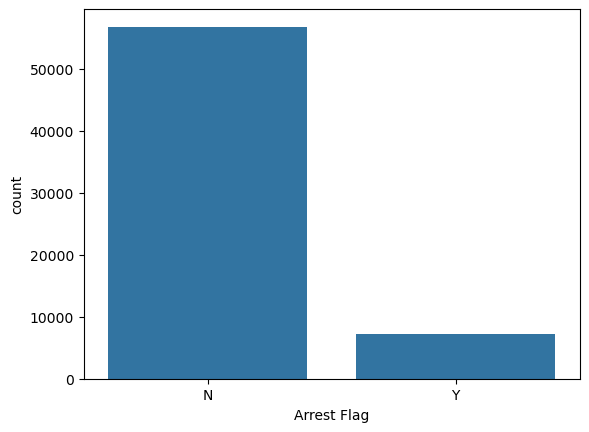

In [36]:
# countplot for the target variable
sns.countplot(x='Arrest Flag', data=df)


In [37]:
df['Arrest Flag'].value_counts()

Arrest Flag
N    56833
Y     7300
Name: count, dtype: int64

No has 56833, which is 88% of the total, while Yes has 7300 which is 12%. This indicates there is class imbalance.

<Axes: xlabel='Frisk Flag', ylabel='count'>

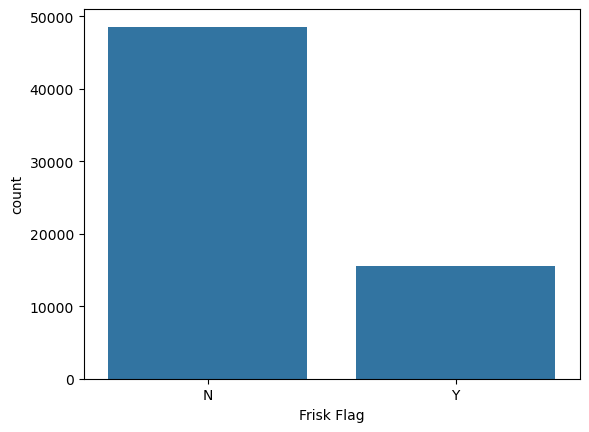

In [38]:
# countplot for the Frisk Flag variable
sns.countplot(x='Frisk Flag', data=df)

In [39]:
df['Frisk Flag'].value_counts()

Frisk Flag
N    48552
Y    15581
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'None'),
  Text(1, 0, 'Knife/Cutting'),
  Text(2, 0, 'Blunt Object'),
  Text(3, 0, 'Firearm'),
  Text(4, 0, 'Chemical'),
  Text(5, 0, 'Other')])

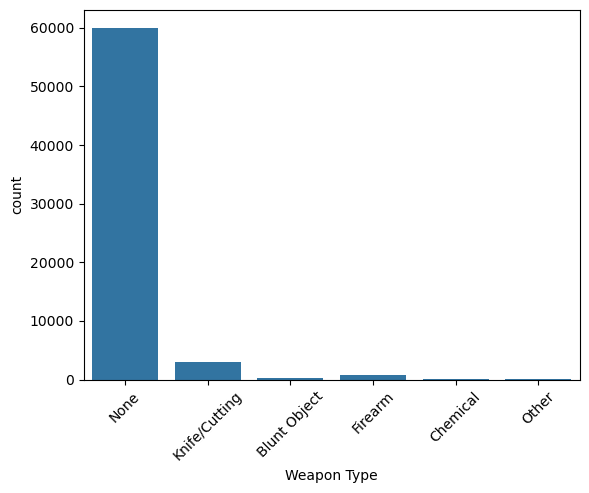

In [40]:
sns.countplot(x='Weapon Type', data=df)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '46 - 55'),
  Text(1, 0, '36 - 45'),
  Text(2, 0, '26 - 35'),
  Text(3, 0, '18 - 25'),
  Text(4, 0, '56 and Above'),
  Text(5, 0, '1 - 17')])

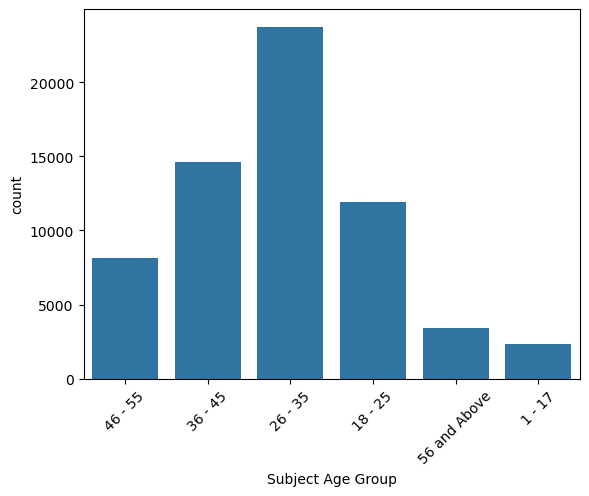

In [41]:
sns.countplot(x='Subject Age Group', data=df)
plt.xticks(rotation=45)

<Axes: xlabel='Subject Perceived Race'>

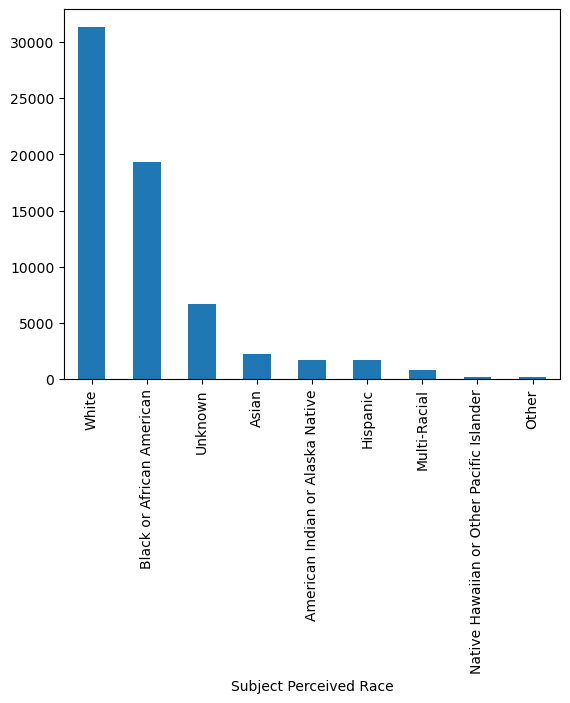

In [42]:

df['Subject Perceived Race'].value_counts().plot(kind='bar')

<Axes: xlabel='Officer Race'>

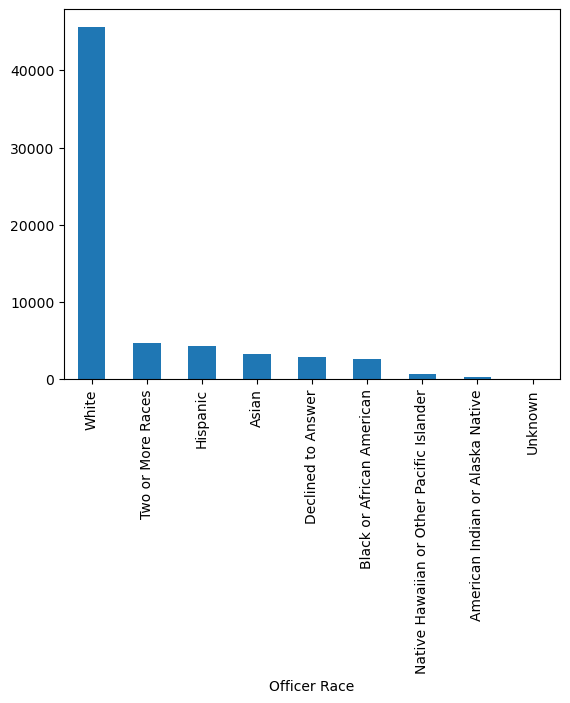

In [43]:
df['Officer Race'].value_counts().plot(kind='bar')


## Bivariate

<Axes: xlabel='Frisk Flag', ylabel='count'>

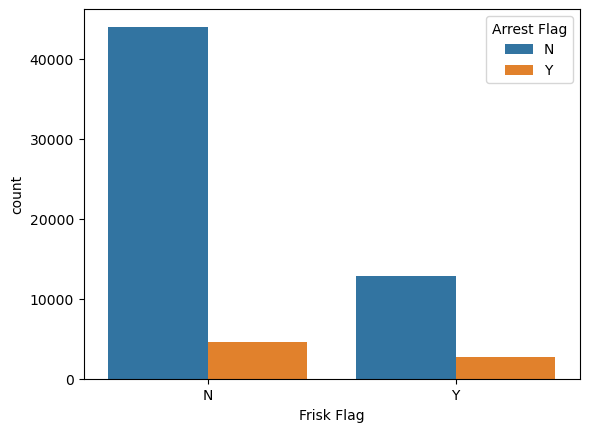

In [44]:
# countplot for 'Frisk Flag' and 'Arrest Flag'
sns.countplot(x ='Frisk Flag',hue= 'Arrest Flag', data=df)

<Axes: xlabel='Subject Perceived Race'>

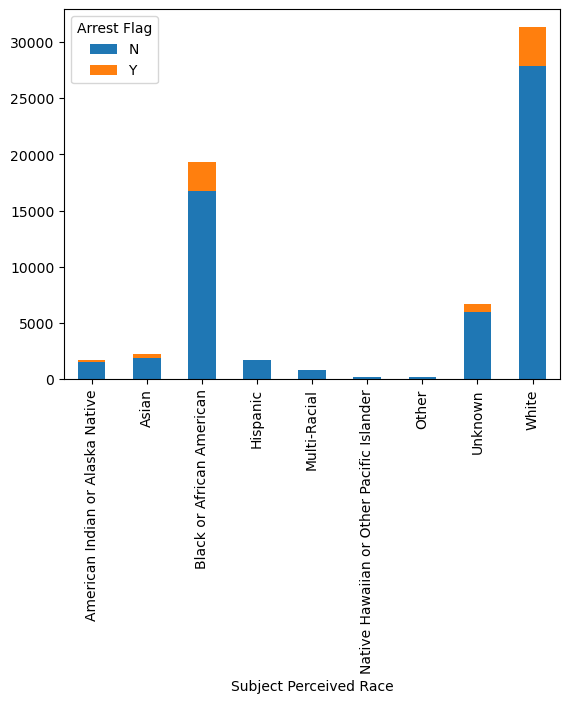

In [45]:
df.groupby(['Subject Perceived Race', 'Arrest Flag']).size().unstack().plot(kind='bar', stacked=True)


In [46]:
df.groupby(['Subject Perceived Race', 'Arrest Flag']).size()

Subject Perceived Race                     Arrest Flag
American Indian or Alaska Native           N               1538
                                           Y                195
Asian                                      N               1903
                                           Y                303
Black or African American                  N              16775
                                           Y               2552
Hispanic                                   N               1674
Multi-Racial                               N                802
Native Hawaiian or Other Pacific Islander  N                137
                                           Y                 47
Other                                      N                152
Unknown                                    N               5976
                                           Y                724
White                                      N              27876
                                           Y     

Terry stops involving Black or African American subject persons lead to arrest 13% of the time which is the highest among all races.

<Axes: xlabel='Subject Age Group'>

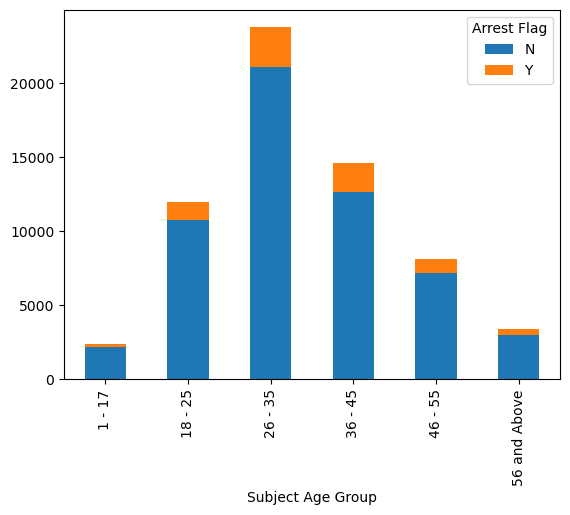

In [47]:
df.groupby(['Subject Age Group', 'Arrest Flag']).size().unstack().plot(kind='bar', stacked=True)

In [48]:
df.groupby(['Subject Age Group', 'Arrest Flag']).size()

Subject Age Group  Arrest Flag
1 - 17             N               2204
                   Y                160
18 - 25            N              10757
                   Y               1188
26 - 35            N              21070
                   Y               2667
36 - 45            N              12624
                   Y               1954
46 - 55            N               7191
                   Y                926
56 and Above       N               2987
                   Y                405
dtype: int64

Terry stops involving subject persons of age group 36-45 lead to arrest 13% of the time which is the highest among all age groups.

## Multivariate

In [49]:
pd.crosstab(df['Arrest Flag'], [df['Officer Race'], df['Subject Perceived Race']])


Officer Race           American Indian or Alaska Native        \
Subject Perceived Race American Indian or Alaska Native Asian   
Arrest Flag                                                     
N                                                    14     6   
Y                                                     0     0   

Officer Race                                                                  \
Subject Perceived Race Black or African American Hispanic Multi-Racial Other   
Arrest Flag                                                                    
N                                             92        4           13     1   
Y                                              1        0            0     0   

Officer Race                                                    Asian        \
Subject Perceived Race Unknown White American Indian or Alaska Native Asian   
Arrest Flag                                                                   
N                           13    94                               74   109   
Y                            0     2                               15    27   

Officer Race            ... Unknown                            White        \
Subject Perceived Race  ...   White American Indian or Alaska Native Asian   
Arrest Flag             ...                                                  
N                       ...       6                             1117  1339   
Y                       ...       2                              125   194   

Officer Race                                                            \
Subject Perceived Race Black or African American Hispanic Multi-Racial   
Arrest Flag                                                              
N                                          12091     1220          500   
Y                                           1636        0            0   

Officer Race                                                            \
Subject Perceived Race Native Hawaiian or Other Pacific Islander Other   
Arrest Flag                                                              
N                                                             83    92   
Y                                                             28     0   

Officer Race                           
Subject Perceived Race Unknown  White  
Arrest Flag                            
N                         4019  20385  
Y                          466   2328  

[2 rows x 74 columns]

<Axes: xlabel='Officer Race-Subject Perceived Race', ylabel='Arrest Flag'>

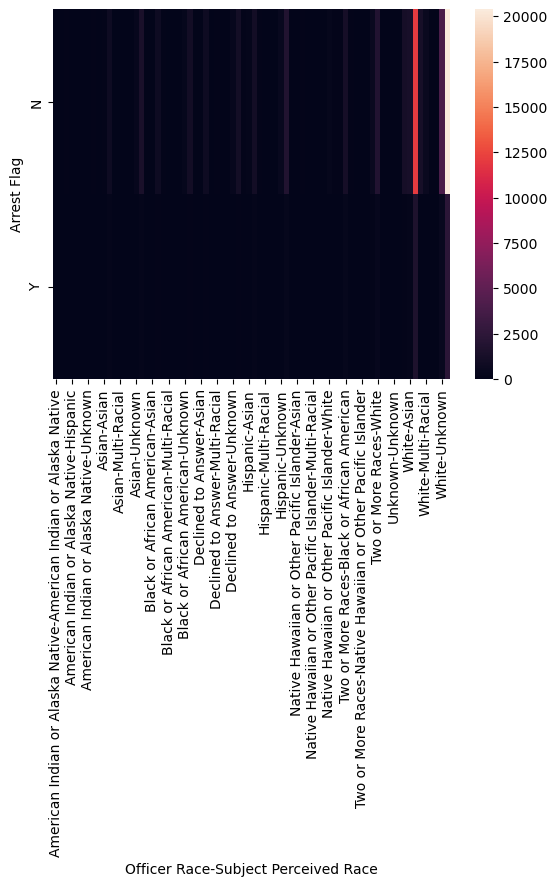

In [50]:
sns.heatmap(pd.crosstab(df['Arrest Flag'], [df['Officer Race'], df['Subject Perceived Race']]))

## 3.2: Preprocessing

In [52]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Arrest Flag'])
y = df['Arrest Flag']

# splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One Hot encoding the Independent features
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)


Used drop='first' to deal with the problem of multicollinearity.

# 4. Modeling

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


# Training a logistic regression model
logmodel = LogisticRegression(penalty='elasticnet', class_weight='balanced', solver='saga', l1_ratio=0.5) # l1_ratio required for elasticnet

logmodel.fit(X_train_encoded, y_train)

# Making predictions
y_pred = logmodel.predict(X_test_encoded)

In [61]:
# Training a DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced', criterion='entropy')

dt_model.fit(X_train_encoded, y_train)

# Making predictions
y_pred_dt = dt_model.predict(X_test_encoded)


In [62]:
class_report = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           N       0.98      0.90      0.94     11327
           Y       0.53      0.87      0.66      1500

    accuracy                           0.90     12827
   macro avg       0.76      0.89      0.80     12827
weighted avg       0.93      0.90      0.91     12827



In [ ]:
cf = confusion_matrix(y_test, y_pred)
cf

In [54]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           N       1.00      0.87      0.93     11327
           Y       0.51      1.00      0.67      1500

    accuracy                           0.89     12827
   macro avg       0.75      0.94      0.80     12827
weighted avg       0.94      0.89      0.90     12827



In [69]:

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=500, 
                                  max_depth=30, 
                                  random_state=42, 
                                  class_weight='balanced_subsample', 
                                  min_samples_split=10, 
                                  min_samples_leaf=1, 
                                  max_features=0.3
                                 )
rf_model.fit(X_train_encoded, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_encoded)

# Evaluation
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           N       0.99      0.89      0.94     11327
           Y       0.53      0.96      0.68      1500

    accuracy                           0.90     12827
   macro avg       0.76      0.92      0.81     12827
weighted avg       0.94      0.90      0.91     12827



In [67]:
# defining parameter grid
dist_params = {
     "class_weight": ["balanced", "balanced_subsample"],
     "n_estimators": [100, 200, 300, 500],
     "max_depth": [None, 10, 20, 30],
     "min_samples_split": [2, 5, 10],
     "min_samples_leaf": [1, 2, 4],
     "max_features": ["sqrt", "log2", 0.3, 0.5]
 }


# Randomized Search
random_search = RandomizedSearchCV(rf_model, param_distributions=dist_params, n_iter=20, cv=3,verbose=2, n_jobs=-1, scoring="f1_macro")

random_search.fit(X_train_encoded, y_train)

print("Best parameters", random_search.best_params_)
print("Best score", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.3, 'max_depth': 30, 'class_weight': 'balanced_subsample'}
Best score 0.8012188396819738


In [71]:
best_rf_model = random_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_encoded)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           N       0.99      0.89      0.94     11327
           Y       0.53      0.96      0.68      1500

    accuracy                           0.90     12827
   macro avg       0.76      0.92      0.81     12827
weighted avg       0.94      0.90      0.91     12827



# 5. Evaluation

In [ ]:
def Classification_report(y_true, y_pred):
    print(classification_report(y_true, y_pred))



# 6. Deployment